# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [58]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [60]:
dataset_train.shape

(1258, 6)

In [62]:
training_set = dataset_train.iloc[:,1:2].values

In [64]:
training_set.shape

(1258, 1)

In [66]:
testing_set = pd.read_csv('Google_Stock_Price_Test.csv')

### Feature Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [71]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
 
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [75]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [79]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [85]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [87]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [89]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [91]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [93]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [95]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [97]:
regressor.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.1849
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0365
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0124
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0078
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0074
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0063
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0056
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0055
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0052
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0060
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0058
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0053
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0051
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0052
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [99]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [102]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


### Visualising the results

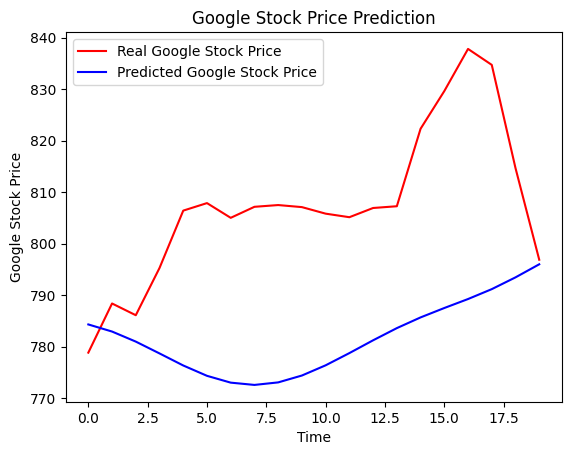

In [105]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
